## Import Package Needed

In [3]:
!pip install utils

In [4]:
import cv2
import time
import uuid   # Unique identifier
import utils
import torch
import numpy as np
from matplotlib import pyplot as plt

## Train Model

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 20 --epochs 1000 --data ship_ds.yml --weights yolov5m6.pt --workers 0

## Load Model

In [18]:
ship_model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp31/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\bilva/.cache\torch\hub\master.zip
YOLOv5  2022-6-10 Python-3.7.13 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 290 layers, 20913549 parameters, 0 gradients, 48.1 GFLOPs
Adding AutoShape... 


In [19]:
IMAGE = os.path.join("full_dataset", "images", "P0905.png")

In [21]:
results = ship_model(IMAGE)
results.print()

image 1/1: 1418x695 100 ships
Speed: 49.5ms pre-process, 31.4ms inference, 46.9ms NMS per image at shape (1, 3, 640, 320)


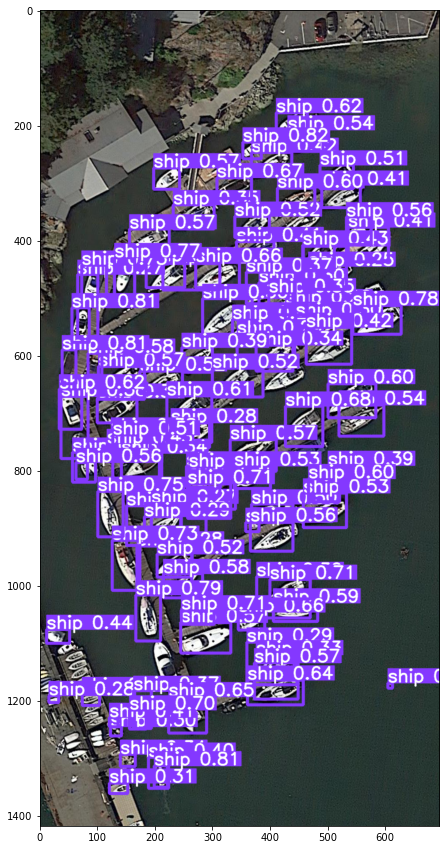

In [22]:
%matplotlib inline
plt.figure(figsize=(20, 15))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
!cd yolov5 && python detect.py --img 320 --conf 0.2 --weights runs/train/exp31/weights/best.pt --source ship_test

detect: weights=['runs/train/exp31/weights/best.pt'], source=ship_test, data=data\coco128.yaml, imgsz=[320, 320], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-244-g47233e1 Python-3.7.13 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 290 layers, 20913549 parameters, 0 gradients, 48.1 GFLOPs
image 1/29 C:\Users\bilva\YOLOv5\yolov5\ship_test\P0695.png: 256x320 140 ships, Done. (0.020s)
image 2/29 C:\Users\bilva\YOLOv5\yolov5\ship_test\P0703.png: 320x224 88 ships, Done. (0.018s)
image 3/29 C:\Users\bilva\YOLOv5\yolov5\ship_test\P0707.png: 256x320 91 ships, Done. (0.024s)
image 4/29 C:\Users\bilva\YOLOv5\yolov5\ship_test\P0713.png

Jadi, dari hasil pendeteksian di atas, terlihat bahwa hasil dari deteksi kapal dapat dikatakan belum baik karena masih banyak yang salah klasifikasi (salah deteksi), sehingga perlu dilakukannya optimasi dari penggunaan algoritma YOLOv5m ini.

In [6]:
display = utils.notebook_init()

AttributeError: module 'utils' has no attribute 'notebook_init'